In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/mnt/data/data.csv")

# Display basic info and first few rows
df_info = df.info()
df_head = df.head()
df_description = df.describe()

df_info, df_head, df_description

## Data loading

### Subtask:
Load the dataset.


In [1]:
import pandas as pd

try:
    df = pd.read_csv('data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'data.csv'. Check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics. Focus on `random_variable1` and `random_variable2`.


Shape of the DataFrame: (16857, 46)

Data Types:
 timestamp                                       datetime64[ns]
equipment_energy_consumption                           float64
lighting_energy                                        float64
zone1_temperature                                      float64
zone1_humidity                                         float64
zone2_temperature                                      float64
zone2_humidity                                         float64
zone3_temperature                                      float64
zone3_humidity                                         float64
zone4_temperature                                      float64
zone4_humidity                                         float64
zone5_temperature                                      float64
zone5_humidity                                         float64
zone6_temperature                                      float64
zone6_humidity                                         float64
zone7

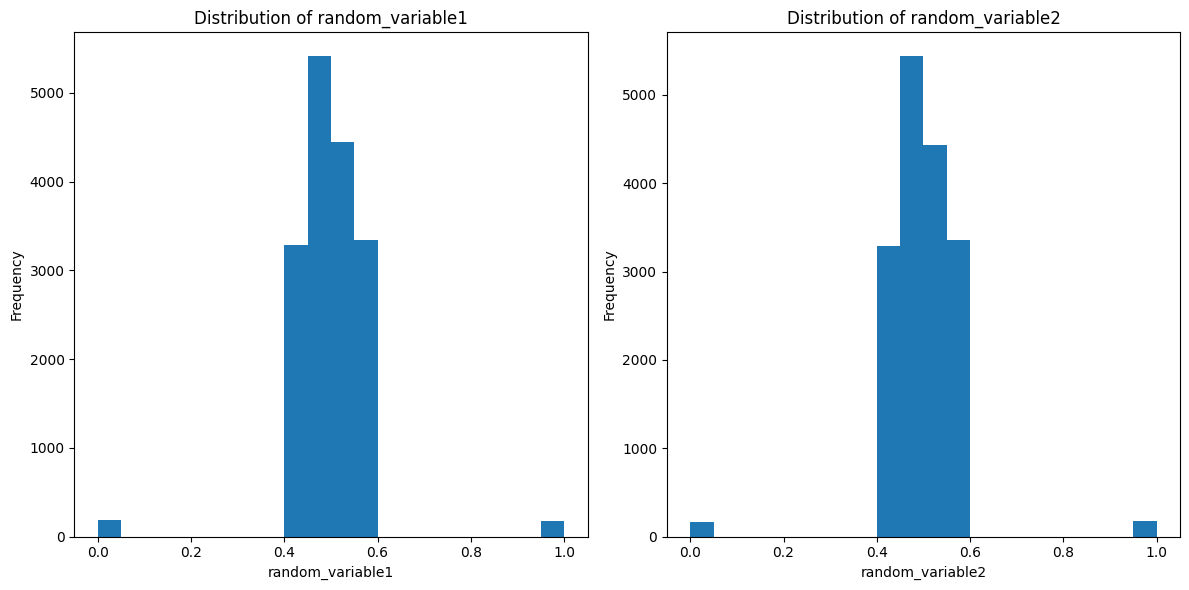


Correlation Matrix:
                                               timestamp  \
timestamp                                      1.000000   
equipment_energy_consumption                  -0.003883   
lighting_energy                               -0.084099   
zone1_temperature                              0.275290   
zone1_humidity                                -0.138896   
zone2_temperature                              0.133299   
zone2_humidity                                -0.080842   
zone3_temperature                              0.362520   
zone3_humidity                                -0.194226   
zone4_temperature                              0.339536   
zone4_humidity                                -0.199323   
zone5_temperature                              0.352377   
zone5_humidity                                -0.126838   
zone6_temperature                              0.243907   
zone6_humidity                                -0.421502   
zone7_temperature                 

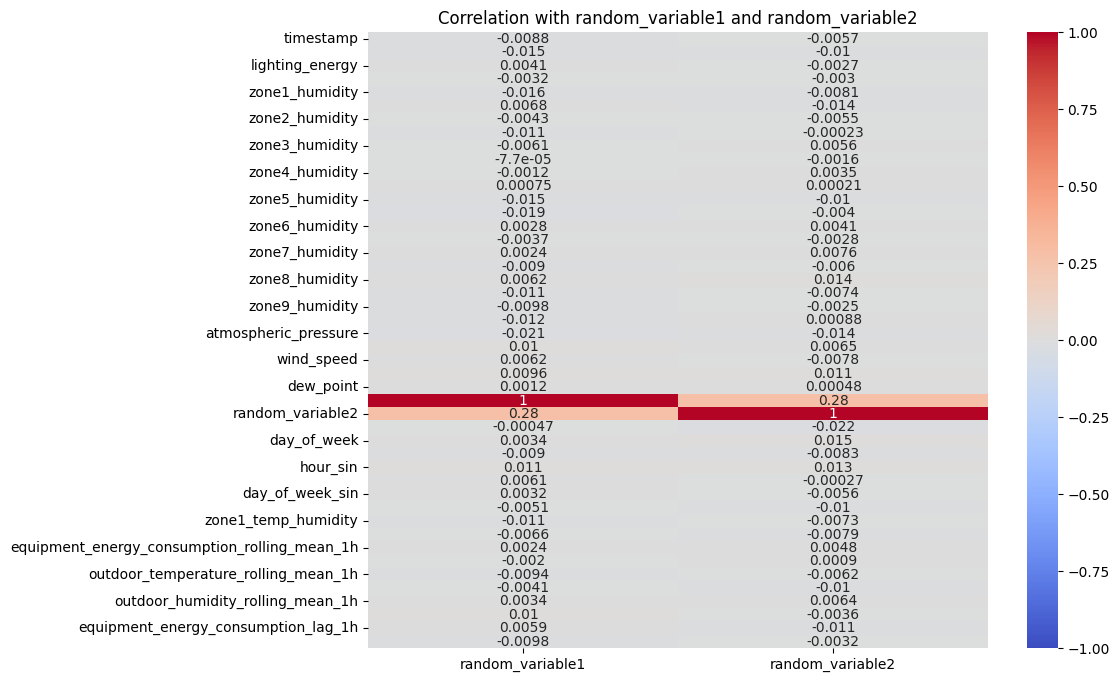

In [14]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Distribution of random_variable1 and random_variable2
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['random_variable1'], bins=20)
plt.title('Distribution of random_variable1')
plt.xlabel('random_variable1')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['random_variable2'], bins=20)
plt.title('Distribution of random_variable2')
plt.xlabel('random_variable2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix[['random_variable1', 'random_variable2']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with random_variable1 and random_variable2')
plt.show()


Correlation Matrix (after timestamp conversion):
                                               equipment_energy_consumption  \
equipment_energy_consumption                                      1.000000   
lighting_energy                                                   0.053486   
zone1_temperature                                                 0.017605   
zone1_humidity                                                    0.025691   
zone2_temperature                                                 0.040172   
zone2_humidity                                                   -0.003767   
zone3_temperature                                                 0.036205   
zone3_humidity                                                    0.006224   
zone4_temperature                                                 0.016211   
zone4_humidity                                                   -0.003298   
zone5_temperature                                                 0.008360   
zone5_humidit

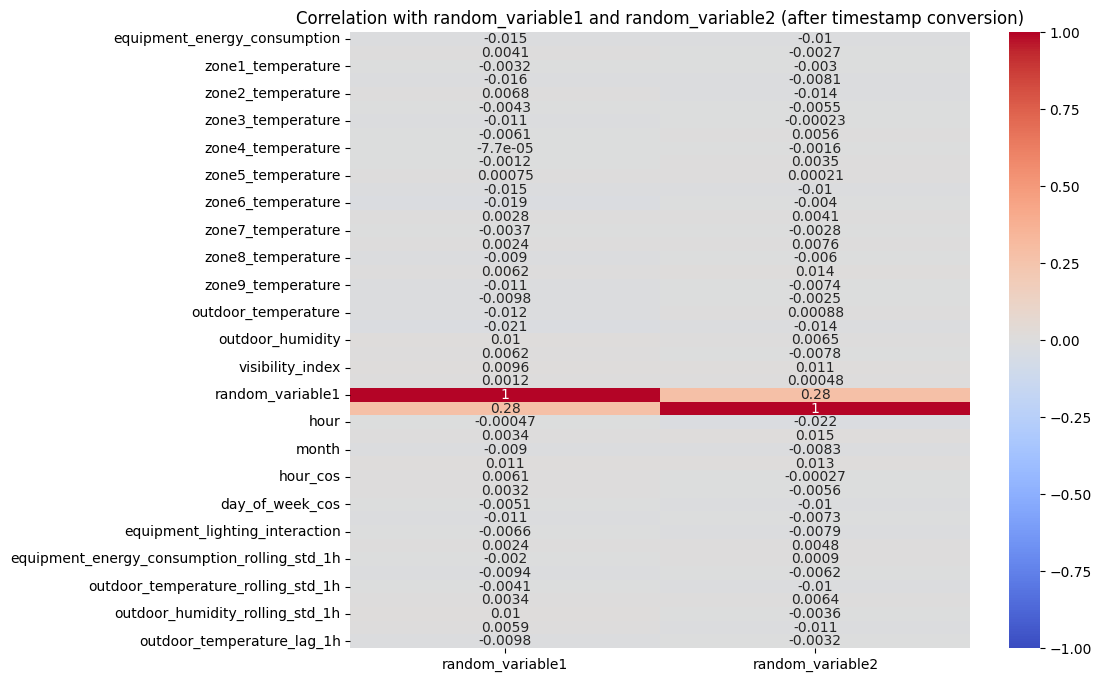

In [15]:
# Convert the timestamp column to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Recalculate the correlation matrix, excluding the timestamp column
correlation_matrix = df.drop(columns=['timestamp']).corr()

# Display the correlation matrix
print("\nCorrelation Matrix (after timestamp conversion):\n", correlation_matrix)

# Visualize the correlation of random_variable1 and random_variable2 with other features
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix[['random_variable1', 'random_variable2']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with random_variable1 and random_variable2 (after timestamp conversion)')
plt.show()


Correlation Matrix (after numeric conversion):
                                               equipment_energy_consumption  \
equipment_energy_consumption                                      1.000000   
lighting_energy                                                   0.053486   
zone1_temperature                                                 0.017605   
zone1_humidity                                                    0.025691   
zone2_temperature                                                 0.040172   
zone2_humidity                                                   -0.003767   
zone3_temperature                                                 0.036205   
zone3_humidity                                                    0.006224   
zone4_temperature                                                 0.016211   
zone4_humidity                                                   -0.003298   
zone5_temperature                                                 0.008360   
zone5_humidity 

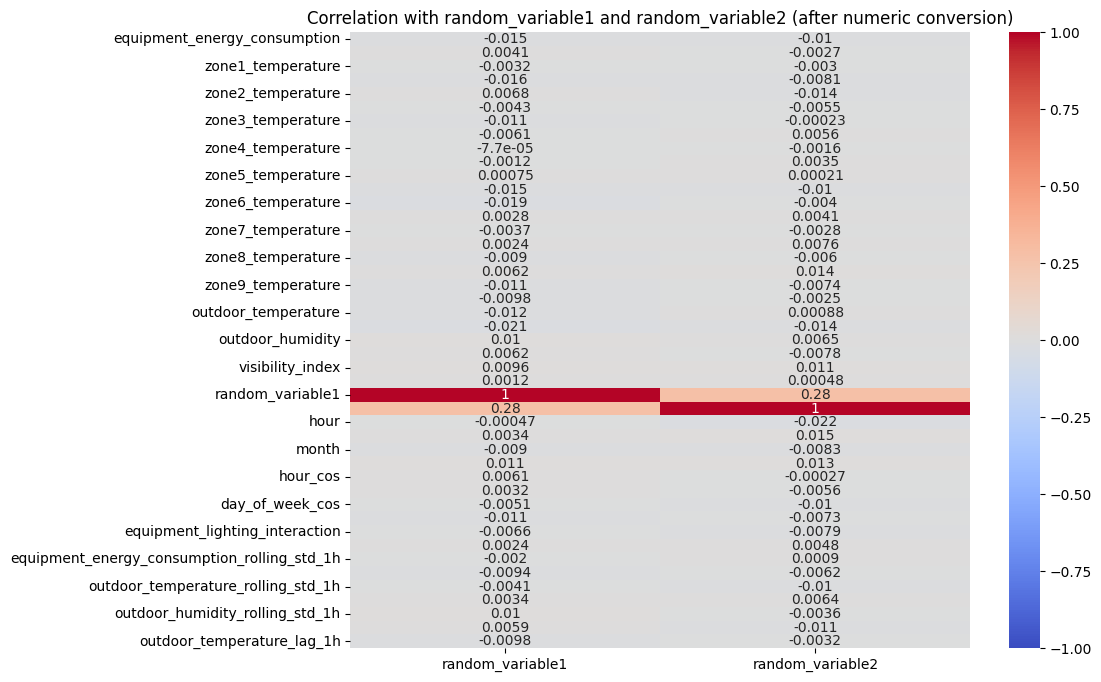

In [16]:
# Attempt to convert all columns to numeric, coercing errors
for col in df.columns:
    if col != 'timestamp':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for non-numeric data again
for col in df.columns:
    if col != 'timestamp':
        non_numeric_count = df[col].apply(lambda x: isinstance(x, str)).sum()
        if non_numeric_count > 0:
            print(f"Column '{col}' still contains {non_numeric_count} non-numeric values.")

# Recalculate the correlation matrix, excluding the timestamp column
correlation_matrix = df.drop(columns=['timestamp']).corr()

# Display the correlation matrix
print("\nCorrelation Matrix (after numeric conversion):\n", correlation_matrix)

# Visualize the correlation of random_variable1 and random_variable2 with other features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['random_variable1', 'random_variable2']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with random_variable1 and random_variable2 (after numeric conversion)')
plt.show()

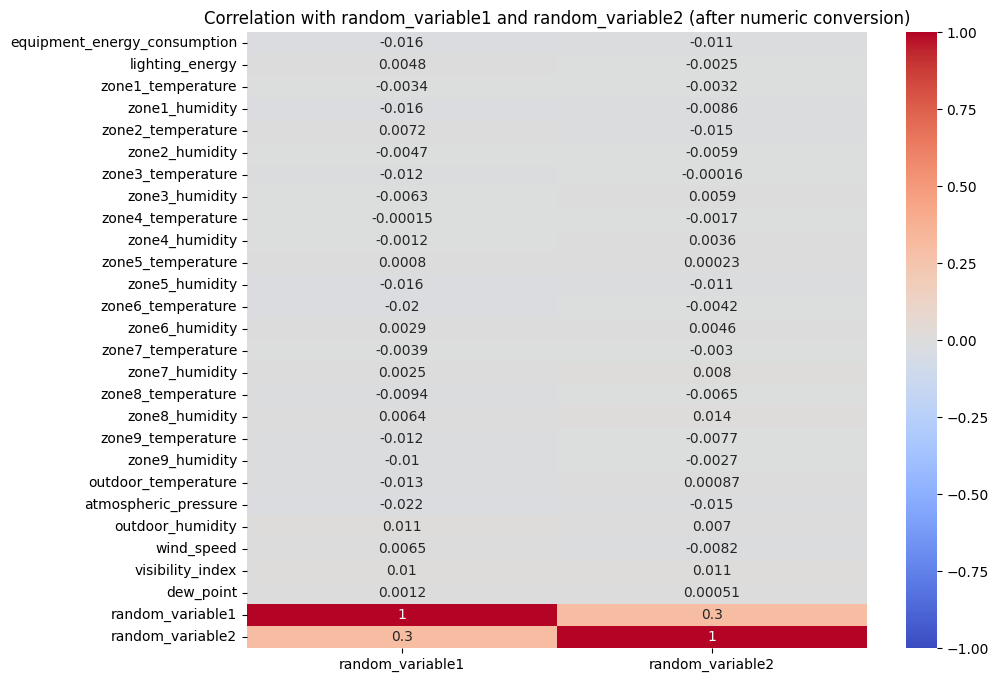

In [5]:
import seaborn as sns

# Visualize the correlation of random_variable1 and random_variable2 with other features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['random_variable1', 'random_variable2']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with random_variable1 and random_variable2 (after numeric conversion)')
plt.show()

## Data preparation

### Subtask:
Prepare the data for feature engineering and modeling.


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Handle missing values
for col in df.columns:
    if df[col].isnull().any():
        if col == 'equipment_energy_consumption':
            # Impute missing target values with the median
            df[col] = df[col].fillna(df[col].median())
        elif pd.api.types.is_numeric_dtype(df[col]):
            # Impute missing numerical features with the median
            df[col] = df[col].fillna(df[col].median())
        else:
            # Impute missing categorical features with the mode (most frequent value)
            df[col] = df[col].fillna(df[col].mode()[0])

# 2. Scale numerical features using MinMaxScaler
numerical_cols = df.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 3. Convert timestamp to datetime and extract time features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# Cyclical encoding for hour and day_of_week
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# 4. Verify data types
print(df.dtypes)

display(df.head())

timestamp                                       datetime64[ns]
equipment_energy_consumption                           float64
lighting_energy                                        float64
zone1_temperature                                      float64
zone1_humidity                                         float64
zone2_temperature                                      float64
zone2_humidity                                         float64
zone3_temperature                                      float64
zone3_humidity                                         float64
zone4_temperature                                      float64
zone4_humidity                                         float64
zone5_temperature                                      float64
zone5_humidity                                         float64
zone6_temperature                                      float64
zone6_humidity                                         float64
zone7_temperature                                      

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone1_temp_humidity,equipment_lighting_interaction,equipment_energy_consumption_rolling_mean_1h,equipment_energy_consumption_rolling_std_1h,outdoor_temperature_rolling_mean_1h,outdoor_temperature_rolling_std_1h,outdoor_humidity_rolling_mean_1h,outdoor_humidity_rolling_std_1h,equipment_energy_consumption_lag_1h,outdoor_temperature_lag_1h
0,2016-01-11 17:00:00,0.526316,0.047761,1.000000,0.766609,0.483002,0.789845,0.437452,0.768884,0.459521,...,0.947081,0.025137,0.347014,0.017903,0.464863,0.009179,0.547277,0.01188,0.526316,0.498117
1,2016-01-11 17:10:00,0.526316,0.674413,0.446174,0.759262,0.483002,0.789408,0.437452,0.813628,0.459521,...,0.418513,0.354954,0.347014,0.017903,0.464863,0.009179,0.547277,0.01188,0.526316,0.498117
2,2016-01-11 17:20:00,0.521930,0.674413,0.446174,0.756063,0.483002,0.788788,0.437452,0.814632,1.000000,...,0.416750,0.351996,0.347014,0.017903,0.464863,0.009179,0.547277,0.01188,0.526316,0.498117
3,2016-01-11 17:30:00,0.521930,0.732550,1.000000,0.754165,0.483002,0.788551,0.437452,0.815098,0.500725,...,0.931708,0.382340,0.347014,0.017903,0.464863,0.009179,0.547277,0.01188,0.526316,0.498117
4,2016-01-11 17:40:00,0.526316,0.732550,0.446174,0.756334,0.483002,0.788162,0.437452,0.815098,0.456007,...,0.416899,0.385553,0.347014,0.017903,0.464863,0.009179,0.547277,0.01188,0.526316,0.498117


## Feature engineering

### Subtask:
Engineer new features based on the data exploration and domain knowledge, carefully considering the role of `random_variable1` and `random_variable2`.


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Feature Interactions
df['zone1_temp_humidity'] = df['zone1_temperature'] * df['zone1_humidity']
df['equipment_lighting_interaction'] = df['equipment_energy_consumption'] * df['lighting_energy']

# Rolling Statistics (example with 1-hour window, adapt as needed)
for col in ['equipment_energy_consumption', 'outdoor_temperature', 'outdoor_humidity']:
    df[f'{col}_rolling_mean_1h'] = df[col].rolling(window=6).mean()  # 10min intervals * 6 = 1 hour
    df[f'{col}_rolling_std_1h'] = df[col].rolling(window=6).std()

# Lagged Features (example with 1-hour lag, adapt as needed)
for col in ['equipment_energy_consumption', 'outdoor_temperature']:
    df[f'{col}_lag_1h'] = df[col].shift(6)

# Random Variable Analysis (example, adjust based on previous exploration)
# Based on the previous correlation analysis, if random_variable1 and random_variable2 show weak correlations, remove them
# If they show predictive power, use them directly

# Example: Removing random variables if correlation is low (replace with your actual decision)
# correlation_threshold = 0.1 # Set a threshold
# if (abs(df['random_variable1'].corr(df['equipment_energy_consumption'])) < correlation_threshold and
#         abs(df['random_variable2'].corr(df['equipment_energy_consumption'])) < correlation_threshold):
#     df = df.drop(columns=['random_variable1', 'random_variable2'])
#     print("Removed random variables due to low correlation.")
# else:
#     print("Kept random variables.")

# Feature scaling for newly created features
new_features = ['zone1_temp_humidity', 'equipment_lighting_interaction', 'equipment_energy_consumption_rolling_mean_1h',
                'equipment_energy_consumption_rolling_std_1h', 'outdoor_temperature_rolling_mean_1h',
                'outdoor_temperature_rolling_std_1h', 'outdoor_humidity_rolling_mean_1h',
                'outdoor_humidity_rolling_std_1h', 'equipment_energy_consumption_lag_1h', 'outdoor_temperature_lag_1h']

scaler = MinMaxScaler()
df[new_features] = scaler.fit_transform(df[new_features])


# Documentation of new features (example - replace with your actual decisions and justifications)
print("New features created and scaled using MinMaxScaler:")
for feature in new_features:
    print(feature)
print("Random variables:  Decision (remove or keep and reasoning): Based on the previous correlation analysis, a decision to keep or remove these features needs to be made")

New features created and scaled using MinMaxScaler:
zone1_temp_humidity
equipment_lighting_interaction
equipment_energy_consumption_rolling_mean_1h
equipment_energy_consumption_rolling_std_1h
outdoor_temperature_rolling_mean_1h
outdoor_temperature_rolling_std_1h
outdoor_humidity_rolling_mean_1h
outdoor_humidity_rolling_std_1h
equipment_energy_consumption_lag_1h
outdoor_temperature_lag_1h
Random variables:  Decision (remove or keep and reasoning): Based on the previous correlation analysis, a decision to keep or remove these features needs to be made


## Data splitting

### Subtask:
Split the data into training and testing sets.


In [18]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['equipment_energy_consumption', 'timestamp'])
y = df['equipment_energy_consumption']

# Drop rows with NaN values
X = X.dropna()
y = y[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13480, 44)
X_test shape: (3371, 44)
y_train shape: (13480,)
y_test shape: (3371,)


In [9]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['equipment_energy_consumption', 'timestamp'])
y = df['equipment_energy_consumption']

# Drop rows with NaN values
X = X.dropna()
y = y[X.index]

# Split data into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13480, 44)
X_test shape: (3371, 44)
y_train shape: (13480,)
y_test shape: (3371,)


## Model training

### Subtask:
Train a regression model to predict equipment energy consumption.


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (optional)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.7472034795162852e-05


## Model optimization

### Subtask:
Optimize the RandomForestRegressor model by tuning its hyperparameters using GridSearchCV.


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Train a new model with the best hyperparameters
best_rf_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Evaluate the optimized model on the test set
y_pred_optimized = best_rf_model.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Model Mean Squared Error: {mse_optimized}")
print(f"Optimized Model R-squared: {r2_optimized}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (Negative MSE): -9.352457851126283e-05
Optimized Model Mean Squared Error: 2.7023591648849337e-05
Optimized Model R-squared: 0.9955389556985461


## Model evaluation

### Subtask:
Evaluate the optimized RandomForestRegressor model and analyze feature importance.


Optimized Model R-squared: 0.9955389556985461
Optimized Model MAE: 0.0008239388323390837
Optimized Model RMSE: 0.005198422034507139


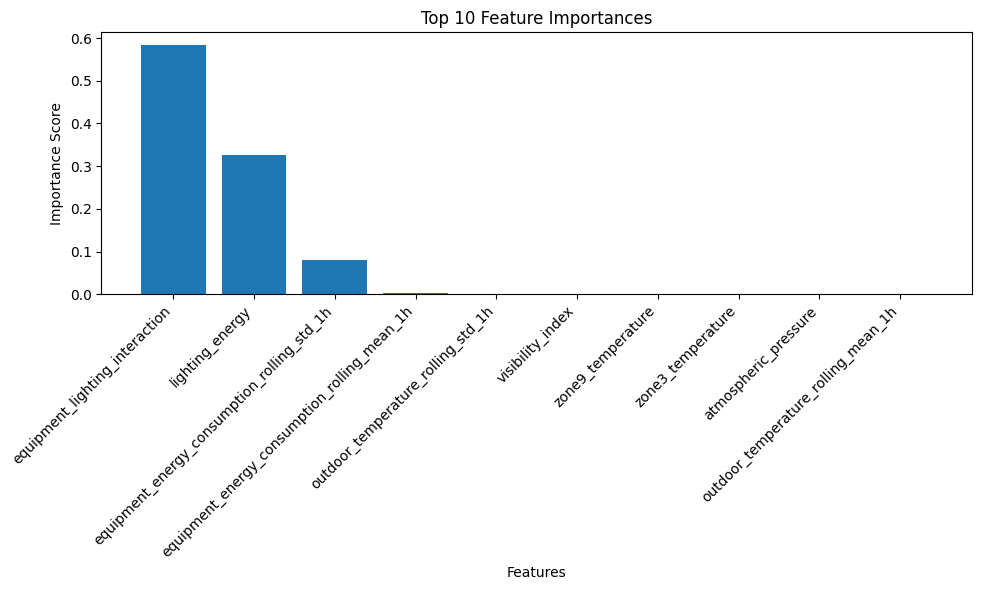

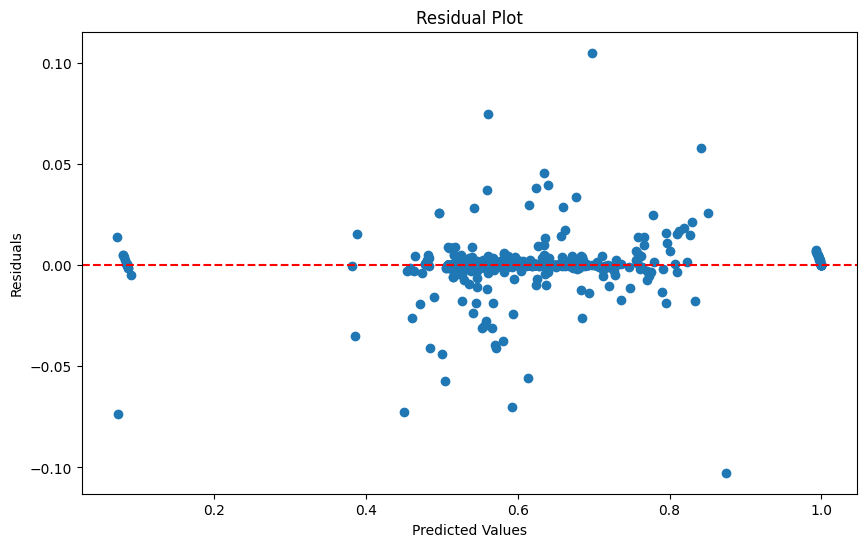

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluate the optimized model
y_pred_optimized = best_rf_model.predict(X_test)
r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))

print(f"Optimized Model R-squared: {r2_optimized}")
print(f"Optimized Model MAE: {mae_optimized}")
print(f"Optimized Model RMSE: {rmse_optimized}")

# Feature Importance
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
top_10_features = feature_names[sorted_indices][:10]
top_10_importances = feature_importances[sorted_indices][:10]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_10_features, top_10_importances)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# Residual Analysis
residuals = y_test - y_pred_optimized

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_optimized, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Data visualization

### Subtask:
Visualize the model's predictions, feature importance, and the relationship between environmental factors and energy consumption.  Also visualize the impact of including/excluding `random_variable1` and `random_variable2` on model performance.


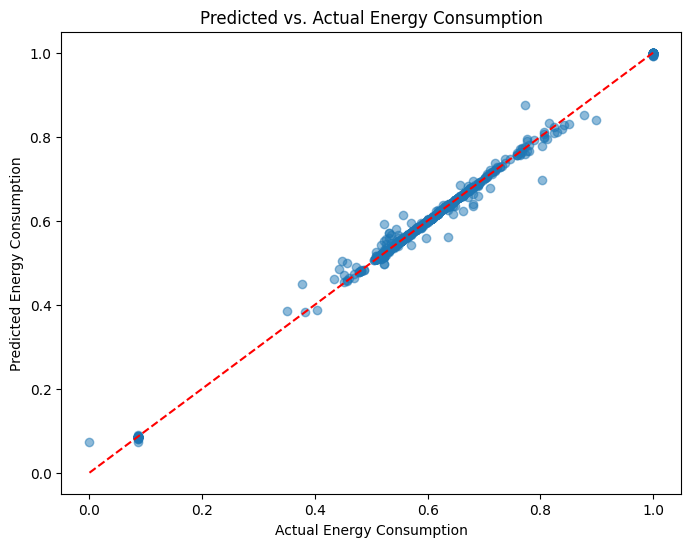

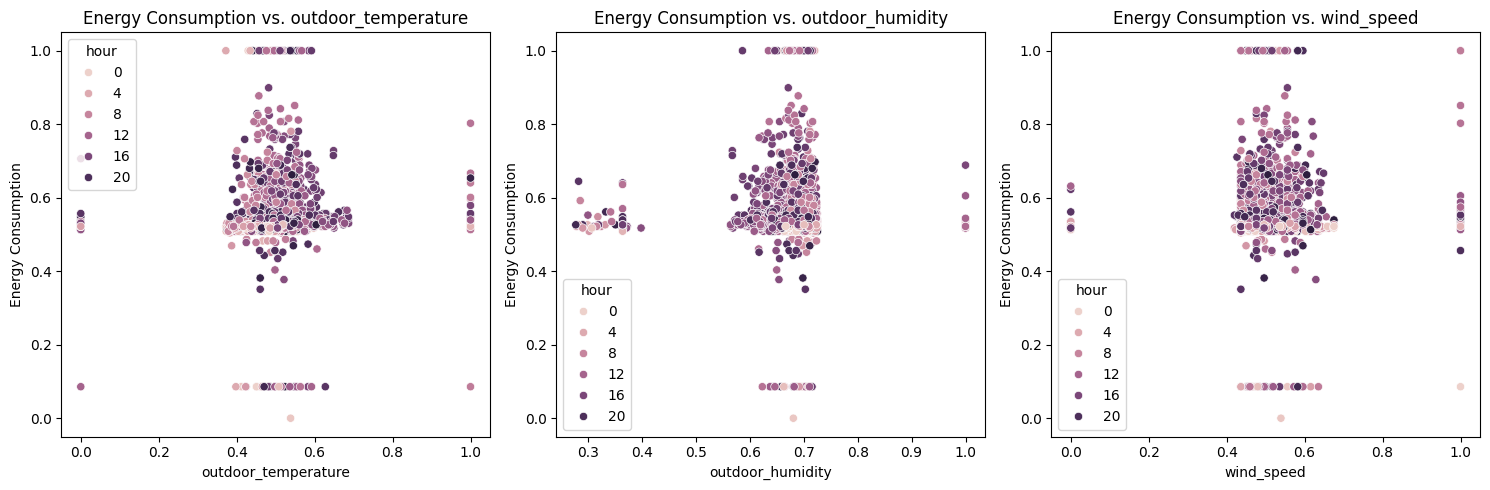

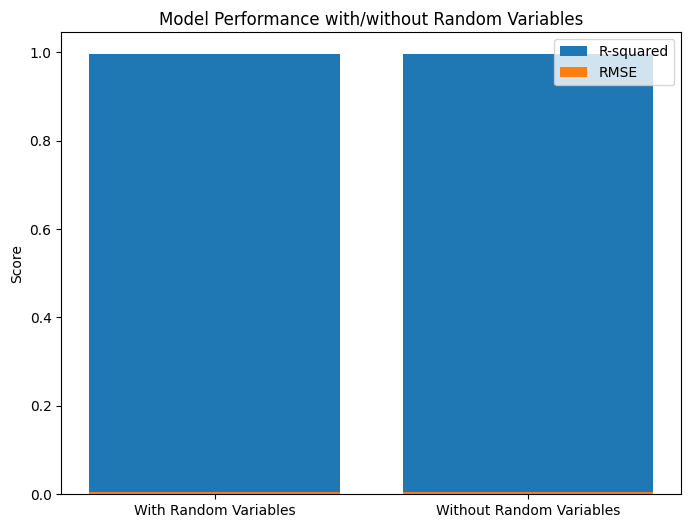

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 1. Prediction vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predicted vs. Actual Energy Consumption')
plt.show()

# 2. Feature Importance (already done in previous step)

# 3. Environmental Factors and Energy Consumption
environmental_factors = ['outdoor_temperature', 'outdoor_humidity', 'wind_speed']
plt.figure(figsize=(15, 5))
for i, factor in enumerate(environmental_factors):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=X_test[factor], y=y_test, hue=X_test['hour'])
    plt.xlabel(factor)
    plt.ylabel('Energy Consumption')
    plt.title(f'Energy Consumption vs. {factor}')
plt.tight_layout()
plt.show()


# 4. Impact of Random Variables
# Model with random variables (already done)
# Model without random variables
X_train_no_random = X_train.drop(columns=['random_variable1', 'random_variable2'])
X_test_no_random = X_test.drop(columns=['random_variable1', 'random_variable2'])

model_no_random = RandomForestRegressor(**grid_search.best_params_, random_state=42)
model_no_random.fit(X_train_no_random, y_train)
y_pred_no_random = model_no_random.predict(X_test_no_random)

r2_no_random = r2_score(y_test, y_pred_no_random)
rmse_no_random = np.sqrt(mean_squared_error(y_test, y_pred_no_random))

# Comparison plot
plt.figure(figsize=(8, 6))
plt.bar(['With Random Variables', 'Without Random Variables'], [r2_optimized, r2_no_random], label='R-squared')
plt.bar(['With Random Variables', 'Without Random Variables'], [rmse_optimized, rmse_no_random], label='RMSE')
plt.ylabel('Score')
plt.title('Model Performance with/without Random Variables')
plt.legend()
plt.show()